## Importing Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c
from datetime import datetime
import logging, os
from numba import njit, jit

## Set logger to log caching activity

In [2]:
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

## Version of 21cmFAST

In [3]:
print(f"Using 21cmFAST version {p21c.__version__}")

Using 21cmFAST version 3.0.0.dev5


## Number of cores running

In [4]:
print(f'Number of threads running = {os.cpu_count()}')

Number of threads running = 16


## Reset cache location 

In [5]:
p21c.config['direc'] = '/lustre/aoc/projects/hera/wchin/21cmFAST-cache'

## Cosmological Parameters (Default is used when no input is specified)

In [6]:
cosmo_params = p21c.CosmoParams()

## User Parameters, like box length, number of voxels (i.e. resolution) etc.

In [7]:
BOX_LEN=301  # 300, 301
HII_DIM=301  # 450, 301

user_params = p21c.UserParams(
    BOX_LEN=BOX_LEN,  # Box length in Mpc
    DIM=4*HII_DIM,      # Number of Voxels for hight resolution 
    HII_DIM=HII_DIM,  # Number of Voxels for low resolution 
    N_THREADS=os.cpu_count()
)

## Creating initial conditions box

In [8]:
start_time = datetime.now()
print(f'Excution qued at {start_time}')

init_cond = p21c.initial_conditions(
    cosmo_params=cosmo_params,
    user_params=user_params,
    direc='/lustre/aoc/projects/hera/wchin/21cmFAST-cache'
)

end_time = datetime.now()
execution_time = end_time - start_time
print(f'Execution completed at {end_time}')
print(f'Execution time = {execution_time}')

Excution qued at 2020-12-28 11:03:22.624392


2020-12-28 11:06:35,002 | INFO | Existing init_boxes found and read in (seed=230806296593).


Execution completed at 2020-12-28 11:06:35.005225
Execution time = 0:03:12.380833


## CHAMP Bootcamp

In [9]:
redshifts = np.arange(8.5, 4, -0.5)
R_BUBBLE_MAXES = np.array([15]*len(redshifts))
HII_EFF_FACTORS = np.array([30]*len(redshifts))

## Generate ionized boxes and total neutral fractions as a function of redshift

In [10]:
# R_BUBBLE_MAXES = np.array(
#     [10, 20, 30]*3
# )
# HII_EFF_FACTORS = np.array(
#     [62.625, 42.042500000000004, 36.183125000000004,
#      47.1875, 34.390625, 31.25, 
#      37.96875, 29.53125, 27.6875]  
# )
# redshifts = np.array([7]*len(R_BUBBLE_MAXES))

progress_status = True



# sample_range = 10
# target_variable = 0.3  # x_HI neutral fraction
# target_error = 0.5  # percent
# error = 1  # intializing
# while abs(error) > target_variable*target_error/100:



ionized_boxes = np.zeros((len(redshifts), HII_DIM, HII_DIM, HII_DIM))
total_neutral_fractions = np.zeros(len(redshifts))

# print progress and local time
if progress_status:
    start_time = datetime.now()
    current_time = start_time
    print(f'Progress = 0%, localtime = {start_time}')

for i, z in enumerate(redshifts):
    ionized_boxes[i] = p21c.ionize_box(
        redshift=z, 
        init_boxes=init_cond,
        astro_params={
            'HII_EFF_FACTOR': HII_EFF_FACTORS[i],
            'R_BUBBLE_MAX': R_BUBBLE_MAXES[i]
        }
    ).xH_box
    total_neutral_fractions[i] = np.mean(ionized_boxes[i])

    # print progress and local time
    if progress_status:
        previous_time = current_time
        current_time = datetime.now()
        loop_time = current_time - previous_time
        elapsed_time = current_time - start_time
        print(f'progress = {int(round((i+1)*100/len(redshifts)))}%, \
localtime = {current_time}, loopexecuted in {loop_time}, elapsedtime = {elapsed_time}')
        
total_neutral_fractions



#     previous_error=error
#     error = target_variable - total_neutral_fractions[0]
    
#     print(f'HII_EFF_FACTOR={HII_EFF_FACTORS[0]}')
#     print(f'x_HI={total_neutral_fractions[0]}')
#     print(f'sample_range={sample_range}')
#     print(f'previous_error={previous_error}')
#     print(f'error={error}')
    
#     if error > 0:
#         HII_EFF_FACTORS[0] -= sample_range
#     else:
#         HII_EFF_FACTORS[0] += sample_range
        
#     if error*previous_error < 0:
#         sample_range -= 0.5*sample_range

Progress = 0%, localtime = 2020-12-28 11:06:35.030801


2020-12-28 11:06:36,653 | INFO | Existing z=8.5 ionized boxes found and read in (seed=230806296593).


progress = 11%, localtime = 2020-12-28 11:06:36.731079, loopexecuted in 0:00:01.700278, elapsedtime = 0:00:01.700278


2020-12-28 11:06:38,830 | INFO | Existing z=8.0 ionized boxes found and read in (seed=230806296593).


progress = 22%, localtime = 2020-12-28 11:06:38.929567, loopexecuted in 0:00:02.198488, elapsedtime = 0:00:03.898766


2020-12-28 11:06:41,058 | INFO | Existing z=7.5 ionized boxes found and read in (seed=230806296593).


progress = 33%, localtime = 2020-12-28 11:06:41.136635, loopexecuted in 0:00:02.207068, elapsedtime = 0:00:06.105834


2020-12-28 11:06:42,752 | INFO | Existing z=7.0 ionized boxes found and read in (seed=230806296593).


progress = 44%, localtime = 2020-12-28 11:06:42.831202, loopexecuted in 0:00:01.694567, elapsedtime = 0:00:07.800401


2020-12-28 11:06:44,488 | INFO | Existing z=6.5 ionized boxes found and read in (seed=230806296593).


progress = 56%, localtime = 2020-12-28 11:06:44.566991, loopexecuted in 0:00:01.735789, elapsedtime = 0:00:09.536190


2020-12-28 11:06:46,262 | INFO | Existing z=6.0 ionized boxes found and read in (seed=230806296593).


progress = 67%, localtime = 2020-12-28 11:06:46.345565, loopexecuted in 0:00:01.778574, elapsedtime = 0:00:11.314764


2020-12-28 11:06:48,057 | INFO | Existing z=5.5 ionized boxes found and read in (seed=230806296593).


progress = 78%, localtime = 2020-12-28 11:06:48.150429, loopexecuted in 0:00:01.804864, elapsedtime = 0:00:13.119628


2020-12-28 11:06:50,238 | INFO | Existing z=5.0 ionized boxes found and read in (seed=230806296593).


progress = 89%, localtime = 2020-12-28 11:06:50.383695, loopexecuted in 0:00:02.233266, elapsedtime = 0:00:15.352894


2020-12-28 11:06:52,270 | INFO | Existing z=4.5 ionized boxes found and read in (seed=230806296593).


progress = 100%, localtime = 2020-12-28 11:06:52.420380, loopexecuted in 0:00:02.036685, elapsedtime = 0:00:17.389579


array([7.32499807e-01, 6.28706887e-01, 4.94936030e-01, 3.38962514e-01,
       1.89180400e-01, 7.99697213e-02, 2.22389814e-02, 3.54182052e-03,
       2.10697631e-04])

## Friends of friends method

https://tools21cm.readthedocs.io/examples/tutorials.html#Bubble-size-distribution

In [11]:
import sys
import skimage

def fof(data, xth=0.5, connectivity=1):
    """
    Determines the sizes using the friends-of-friends approach.
    It assumes the length of the grid as the linking length.

    Parameters
    ----------
    data: ndarray 
        The array containing the input data
    xth: float 
        The threshold value (Default: 0.5)

    Returns
    -------
    map: ndarray
        array with each regions of interest label
    sizes: list
        all the sizes
        
    1-connectivity      2-connectivity
          [ ]           [ ]  [ ]  [ ]
           |               \  |  /
     [ ]--[x]--[ ]      [ ]--[x]--[ ]
           |               /  |  \
          [ ]           [ ]  [ ]  [ ]
      
    """
    use_skimage=True
    t1 = datetime.now()
    data = (data>=xth)  # creating binary box
    if 'skimage' in sys.modules and use_skimage:  # use skimage if installed
        from skimage import morphology
        out_map = morphology.label(data, connectivity=connectivity)  # box with neutral regions labelled
        elements, size_list = np.unique(out_map, return_counts=True)
        size_list = size_list[1:]  # first entry corresponds to background
    else: out_map, size_list = FoF_search(data, xth)
    t2 = datetime.now()
    runtime = (t2-t1).total_seconds()/60

    print("Program runtime: %f minutes." %runtime)
    print("The output is a tuple containing output-map and volume-list array respectively.")

    return out_map, size_list

## Binning the data with a log scale

In [12]:
def plot_fof_sizes(sizes, bins=100, boxsize=None, normalize='box'):
    lg = np.log10(np.array(sizes))
    ht = np.histogram(lg, bins=bins)
    xx = 10**ht[1]
    yy = ht[0]*xx[:-1]
    if boxsize is None: boxsize = conv.LB
    if normalize=='ionized': zz = yy/np.sum(yy)
    else: zz = yy/boxsize**3
    dummy = zz[zz!=0].min()/10.
    zz[zz==0] = dummy
    zz = np.hstack((zz,dummy))
    print("The output is Size, Size**2 dP/d(Size), lowest value")
    return xx, zz, dummy

## Alternative if sci kit is not installed, currently seems to not work

In [13]:
"""
Implementing a basic searching algorithm to identify grouped areas of high
values in an array
Can either be imported and used in a seperate script, 
or run via command line with an input file and an
output file as arguments. Output file will be a string 
representation of a list, with no modifications, this can be read
in python using the 'ast' module, with:
sizes_list = ast.literal_eval(sizes_string)
"""

import numpy as np
from itertools import count
#from Queue import Queue
from multiprocessing import Queue


def FoF_search(array, threshold):
    """
    :param array: n-dimensional scalar array to search
    :param threshold: float
    :return: (out_map, size_list) n-dimensional array with points 
    filled with corresponding group number
        (0 if not above threshold), and a 1D list containing group sizes
    """
    # generator which returns indices next to a given index
    def cycle_through_options(coord):    
        for i in range(len(coord)):
            for j in [-1, 1]:
                new_coordinate = [k for k in coord]
                new_coordinate[i] += j
                yield tuple(new_coordinate)

    # creates an array with the same shape as the input search array
    out_map = np.zeros(array.shape, dtype=int)   
    # creates a list of indices of points above the threshold
    possibilities = zip(*np.where(array > threshold))  
    poss_set = set(possibilities)
    
    # function to calculate group membership of a point
    def recursive_search(point, current_group, currentsize):    
        for testPoint in cycle_through_options(point):
            if testPoint in poss_set and not out_map[testPoint]:
                out_map[testPoint] = current_group
                q.put(testPoint)
                currentsize += 1
        return currentsize
    c = count()
    #c.next()
    next(c)
    size_list = []
    q = Queue()             # initialise a queue
    for p in possibilities:     # start cycling through possible points
        if not out_map[p]:           # if the point has not already been searched,
            group = next(c)        # start a new group number
            # assign the corresponding point in the group map to this group
            out_map[p] = group       
            q.put(p)                # put the point in the queue
            s = 1                   # s contains the new group size
            while not q.empty():    # cycle till queue is empty
                s = recursive_search(q.get(), group, s)  # search each neighbour recursively
            size_list.append(s)     # add size of group to a list
    return out_map, np.array(size_list)


# Probably old outdated code that authors left around

# def gaussian(dx, sig):
#     """returns a one dimensional gaussian"""
#     return np.exp(-dx**2.0/(2.0*sig**2.0))


# def halo3d(x, a, sigma, array_size):
#     """
#     Returns an array with size arSize^3 and one gaussian
#     distribution with amplitude a and s.d. sigma
#     somewhere within that array
#     :param x: 3d vector to be the mean of gaussian
#     :param a: float amplitude
#     :param sigma: float s.d.
#     :param array_size: size of array to output
#     :return: 3d array as detailed above
#     """
#     ar = np.zeros(array_size, dtype=float)
#     for i in range(array_size[0]):
#         for j in range(array_size[1]):
#             for k in range(array_size[2]):
#                 dx = float(reduce(lambda foo, y: foo+y**2, [0, i-x[0], j-x[1], k-x[2]]))
#                 ar[i, j, k] = a*gaussian(dx, sigma)
#     return ar

# if __name__ == "__main__":
#     import sys
#     import c2raytools as c2t
#     try:
#         infile = sys.arg[1]
#         outfile = sys.argv[2]
#         x_file = c2t.XfracFile(infile)
#         ret, sizes = friend_of_friend_search(x_file.xi, 0.5)
#         with open(outfile, 'w') as out_file:
#             out_file.write(str(sizes))
#     except IndexError as e:
#         print("Error: expected an input ionised fraction file and an output file")

## Making fof 3x3 plots

In [14]:
def fof_plot(
    x1s,
    y1s, 
    figure_shape, 
    title=None,
    text=None,
    shared_title=None,
    shared_title_x_position=0.5,   # figure coordinates, max=1 I think
    shared_title_y_position=0.93,
    shared_x_label=None, 
    shared_x_label_x_position=0.5,
    shared_x_label_y_position=0.08,
    shared_y_label=None, 
    shared_y_label_x_position=0.07,
    shared_y_label_y_postion=0.5,
    color='white', 
    figure_size=(18,19), 
    font_size=15, 
    horizontal_gap=0.05, 
    vertical_gap=0.05, 
    y_scale='log', 
    x_scale='log', 
    y_notation='plain', 
    share_x_axis=True, 
    share_y_axis=True,
    dpi=100
):
                    
    fig, axes = plt.subplots(
        figure_shape[0], 
        figure_shape[1], 
        figsize=figure_size, 
        sharex=share_x_axis, 
        sharey=share_y_axis, 
        gridspec_kw={"hspace":vertical_gap, 'wspace':horizontal_gap},
        dpi=dpi,
        facecolor='#404040'
    )

    if shared_title != None:

        fig.suptitle(
            x=shared_title_x_position, 
            y=shared_title_y_position, 
            t=shared_title, ha='center', 
            size=1.5*font_size, 
            color=color
        )

    if shared_x_label != None:  # shared x label
        fig.text(
            x=shared_x_label_x_position, 
            y=shared_x_label_y_position, 
            s=shared_x_label, ha='center', 
            size=font_size, 
            color=color
        )

    if shared_y_label != None:  # shared y label
        fig.text(
            x=shared_y_label_x_position, 
            y=shared_y_label_y_postion, 
            s=shared_y_label, 
            va='center', 
            rotation='vertical', 
            size=font_size, 
            color=color
        )

    for i, y1 in enumerate(y1s):

        axes.flatten()[i].step(
        x1s[i][:int((bin_num_fof+1)*percent)], 
        y1[:int((bin_num_fof+1)*percent)]
        )

        if title != None:
            axes.flatten()[i].set_title(title[i], color=color, fontsize=font_size)
        
        if text != None:
            axes.flatten()[i].text(
                x=0.6,
                y=1.,
                s=text[i],
                size=font_size,
                va='top',
                ha='left'
            )

        axes.flatten()[i].set_yscale(y_scale)
        axes.flatten()[i].set_xscale(x_scale)

        if y_notation == 'sci':
            axes.flatten()[i].ticklabel_format(
                axis='y', 
                style=y_notation, 
                scilimits=(0,0), 
                useMathText=True
            )

        axes.flatten()[i].tick_params(
            color=color, 
            labelcolor=color, 
            labelsize=font_size,
            which='both'
        )  # font style

        for spine in axes.flatten()[i].spines.values():  # figure color
            spine.set_edgecolor(color)

    plt.show()

## Calling function to generate neutral region size distributions with fof()

In [15]:
bin_num_fof = int(2e2)
fof_sizes = np.zeros((len(redshifts), bin_num_fof+1))
fof_sizes_probabilities = np.zeros((len(redshifts), bin_num_fof+1))
for i, box in enumerate(ionized_boxes):
    fof_sizes[i], fof_sizes_probabilities[i], _ = plot_fof_sizes(
        fof(box)[1], 
        bins=bin_num_fof, 
        boxsize=BOX_LEN
    )

Program runtime: 0.184941 minutes.
The output is a tuple containing output-map and volume-list array respectively.
The output is Size, Size**2 dP/d(Size), lowest value
Program runtime: 0.020282 minutes.
The output is a tuple containing output-map and volume-list array respectively.
The output is Size, Size**2 dP/d(Size), lowest value
Program runtime: 0.019521 minutes.
The output is a tuple containing output-map and volume-list array respectively.
The output is Size, Size**2 dP/d(Size), lowest value
Program runtime: 0.019862 minutes.
The output is a tuple containing output-map and volume-list array respectively.
The output is Size, Size**2 dP/d(Size), lowest value
Program runtime: 0.017342 minutes.
The output is a tuple containing output-map and volume-list array respectively.
The output is Size, Size**2 dP/d(Size), lowest value
Program runtime: 0.016479 minutes.
The output is a tuple containing output-map and volume-list array respectively.
The output is Size, Size**2 dP/d(Size), lowes

## Plotting fof() distributions

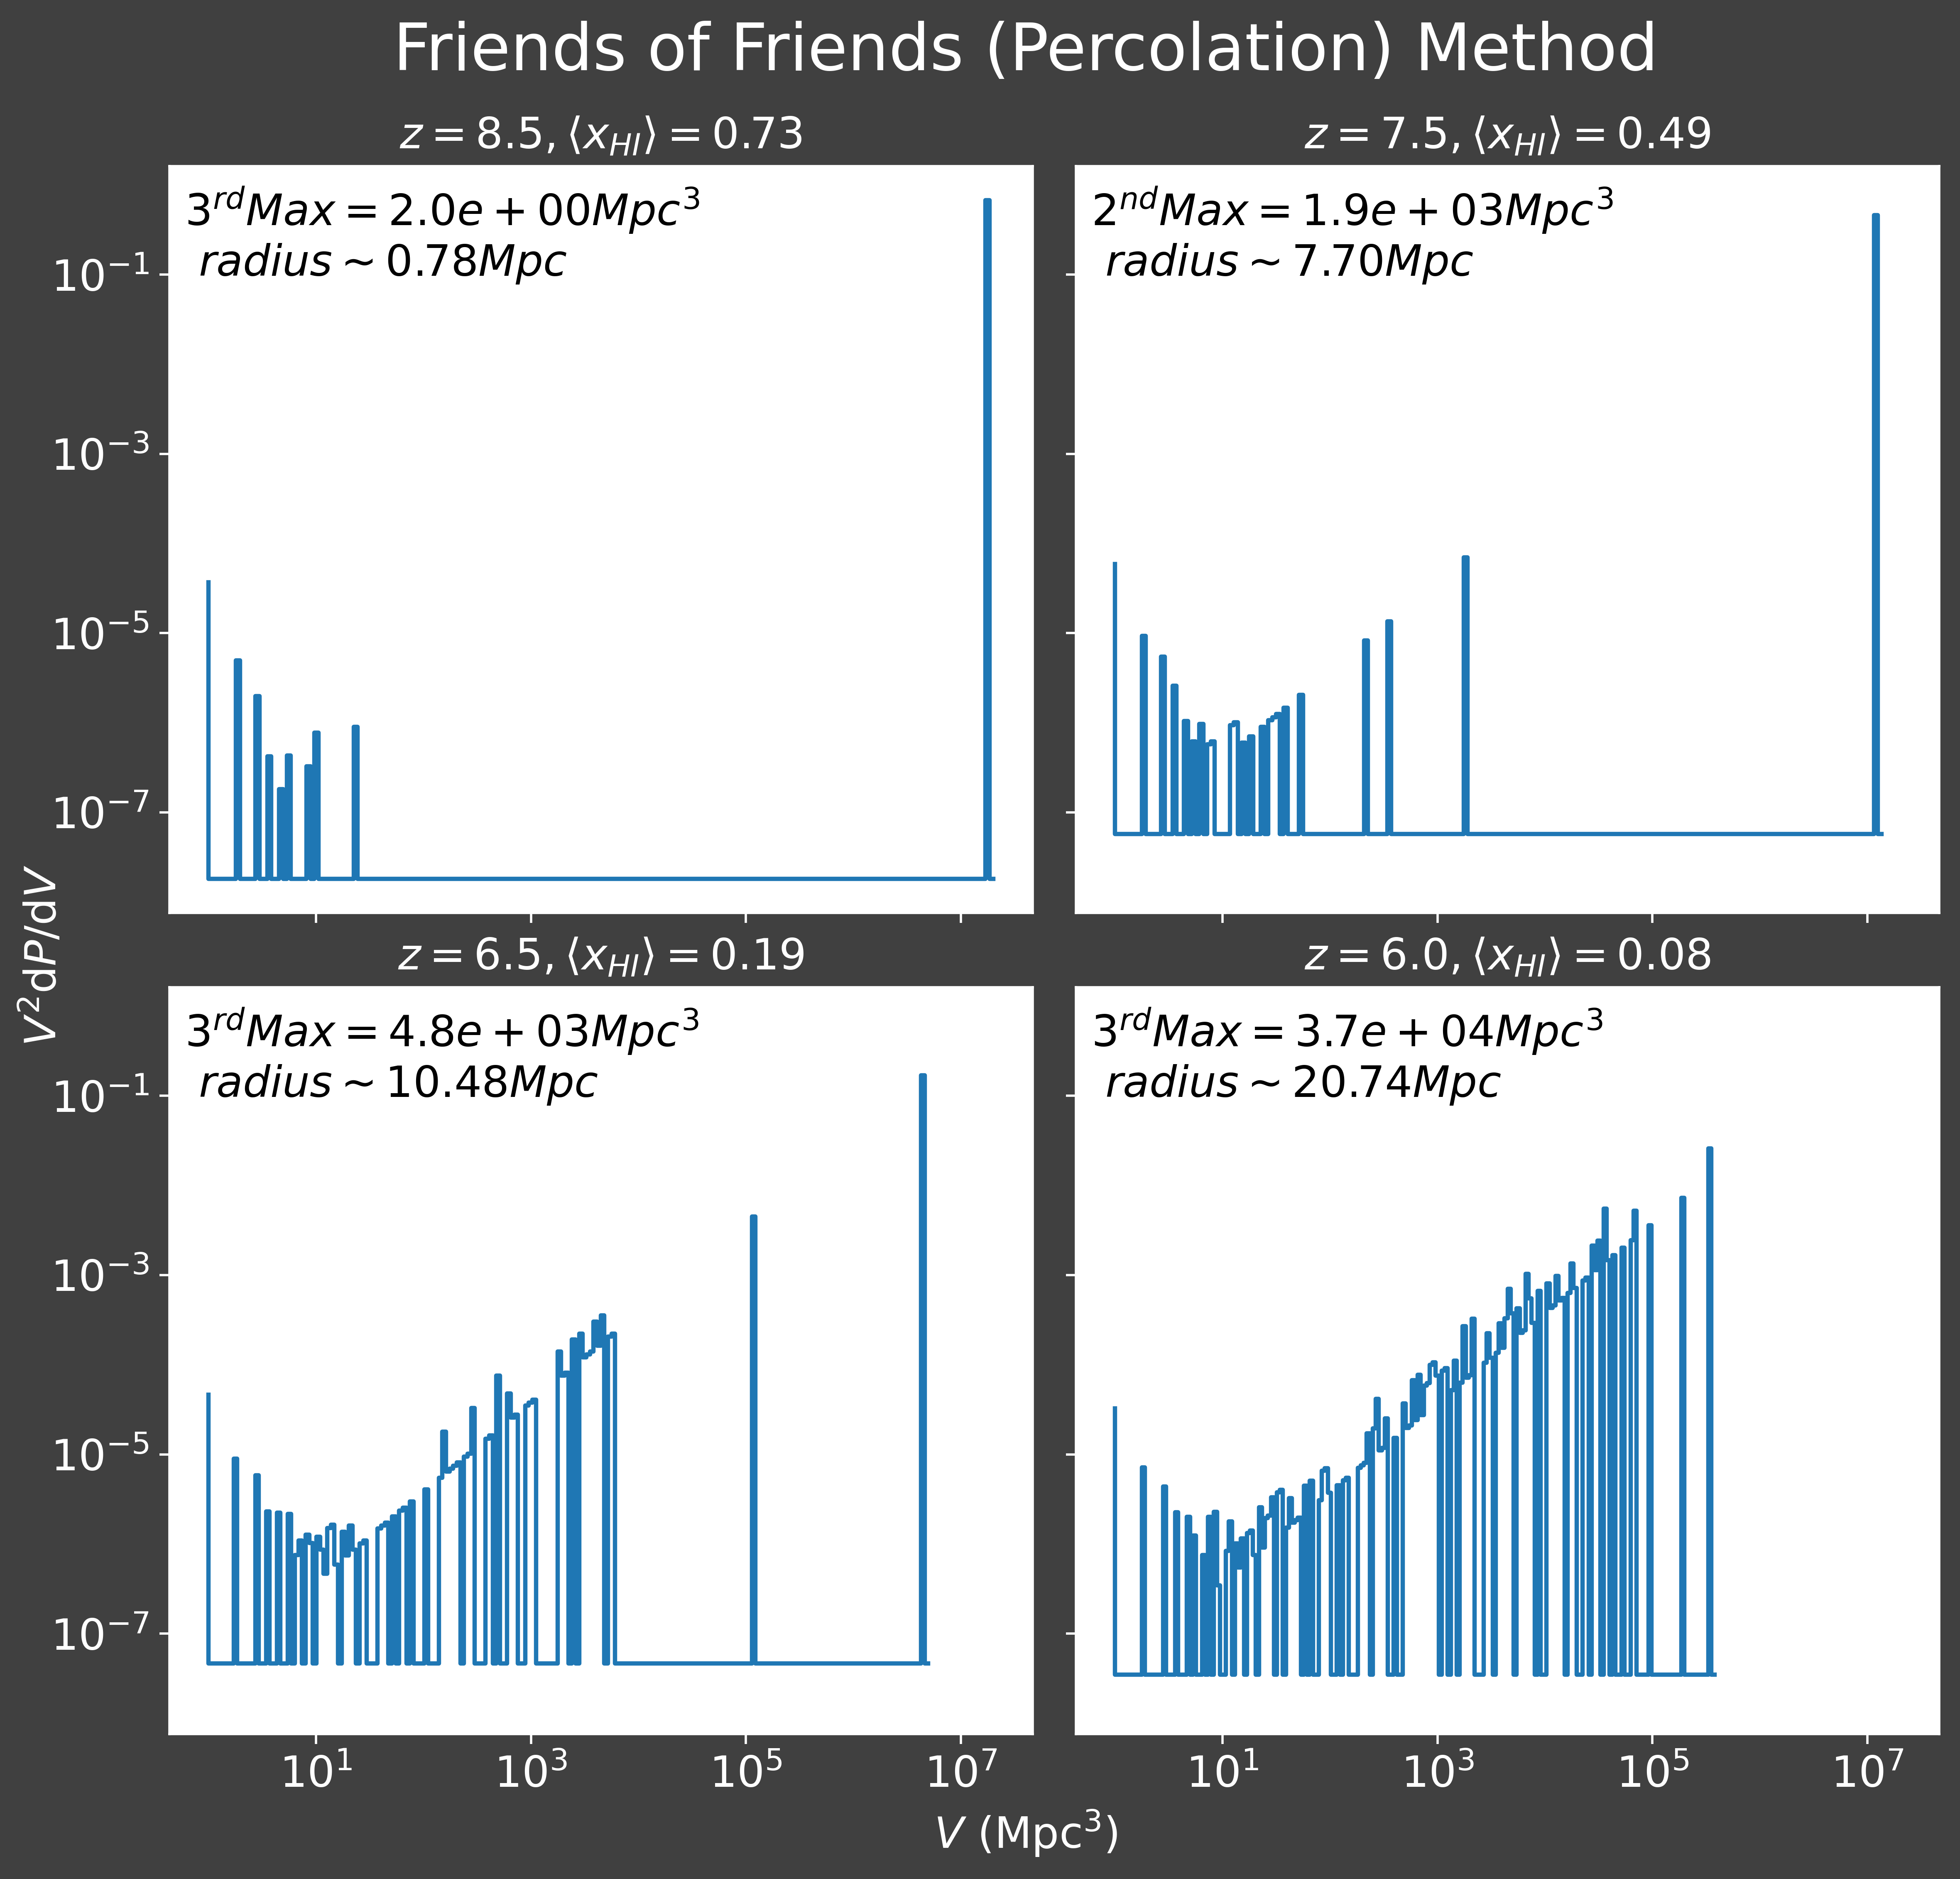

In [16]:
percent=1
which_max = np.array([
    f'$3^{{rd}}Max$',  # 1
    f'$3^{{rd}}Max$',  # 2
    f'$2^{{nd}}Max$',  # 3
    f'$2^{{nd}}Max$',  # 4
    f'$3^{{rd}}Max$',  # 5
    f'$3^{{rd}}Max$',  # 6
    f'$Max$',  # 7
    f'$Max$',  # 8
    f'$Max$'])  # 9
which_max_ind = np.array(
    [3,  # 1
     3,  # 2
     2,  # 3
     2,  # 4
     3,  # 5
     3,  # 6
     1,  # 7
     1,  # 8
     1]) # 9

fof_plot(
    x1s=fof_sizes[[0, 2, 4, 5]],
    y1s=fof_sizes_probabilities[[0, 2, 4, 5]],
    figure_shape=[2,2],
    title=[f'$z={redshifts[[0, 2, 4, 5]][i]:.1f},$' r'$ \langle x_{{HI}} \rangle$' f'$={total_neutral_fractions[[0, 2, 4, 5]][i]:.2f}$' for i in range(4)],
    text=[f'{which_max[[0, 2, 4, 5]][i]}$={fof_sizes[[0, 2, 4, 5]][i][np.argsort(probability)[-which_max_ind[[0, 2, 4, 5]][i]]]:.1e}\
{{Mpc}}^3$ \n $radius \sim {(fof_sizes[[0, 2, 4, 5]][i][np.argsort(probability)[-which_max_ind[[0, 2, 4, 5]][i]]]/4.*3./np.pi)**(1./3.):.2f}Mpc$' for i, probability in enumerate(fof_sizes_probabilities[[0, 2, 4, 5]])],
    vertical_gap=0.1,
    shared_x_label='$V$ (Mpc$^3$)',
    shared_y_label='$V^2\mathrm{d}P/\mathrm{d}V$',
    shared_title='Friends of Friends (Percolation) Method',
    figure_size=(11,10),
    dpi=500,
    shared_title_y_position=0.95,
    shared_x_label_y_position=0.07,
    shared_y_label_x_position=0.06,
    color='w'
)

In [18]:
V = 2.e0
(V/4.*3./np.pi)**(1./3.)

0.781592641796772

In [19]:
V = 1.9e3
(V/4.*3./np.pi)**(1./3.)

7.6834274919558085

In [20]:
V = 4.8e3
(V/4.*3./np.pi)**(1./3.)

10.464477359210589

In [21]:
V = 3.5e5
(V/4.*3./np.pi)**(1./3.)

43.71795227951174

In [ ]:
percent=1
which_max = np.array([
    f'$3^{{rd}}Max$',  # 1
    f'$3^{{rd}}Max$',  # 2
    f'$2^{{nd}}Max$',  # 3
    f'$2^{{nd}}Max$',  # 4
    f'$3^{{rd}}Max$',  # 5
    f'$Max$',  # 6
    f'$Max$',  # 7
    f'$Max$',  # 8
    f'$Max$'])  # 9
which_max_ind = np.array(
    [3,  # 1
     3,  # 2
     2,  # 3
     2,  # 4
     3,  # 5
     1,  # 6
     1,  # 7
     1,  # 8
     1]) # 9

fof_plot(
    x1s=fof_sizes,
    y1s=fof_sizes_probabilities,
    figure_shape=[3,3],
    title=[f'z={redshifts[i]:.1f}, x_HI={total_neutral_fractions[i]*100:.1f}%, \
{which_max[i]}={fof_sizes[i][np.argsort(probability)[-which_max_ind[i]]]:.1e}\
' for i, probability in enumerate(fof_sizes_probabilities)],
    vertical_gap=0.2,
    shared_x_label='$V$ (Mpc$^3$)',
    shared_y_label='$V^2\mathrm{d}P/\mathrm{d}V$',
    shared_title=f'Our boxes, FOF method: Vary: Rmax, EFF, constant: x_HI, z={redshifts[0]}'
)